In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [2]:
#Decision Tree classifier
dataset=pd.read_csv("45features.csv")
df = dataset.dropna()
X = df.drop('course_id', axis=1)
df['course_id'] = df['course_id'].map(
    {'DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila':0,'7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx':1,
    'AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd':2,'5X6FeZozNMgE2VRi3MJYjkkFK8SETtu2':3,
    'TAYxxh39I2LZnftBpL0LfF2NxzrCKpkx':4,'KHPw0gmg1Ad3V07TqRpyBzA8mRjj7mkt':5,
    'fbPkOYLVPtPgIt0MxizjfFJov3JbHyAi':6,'81UZtt1JJwBFYMj5u38WNKCSVA4IJSDv':7,
    '5Gyp41oLVo7Gg7vF4vpmggWP5MU70QO6':8,'Er0RFawC4sHagDmmQZcBGBrzamLQcblZ':9,
    'mTmmr5zd8l4wXhwiULwjSmSbi9ktcFmV':10,'SpATywNh6bZuzm8s1ceuBUnMUAeoAHHw':11,
    'shM3Yy9vxHn2aqjSYfQXOcwGo0hWh3MI':12,'xMd9DzNyUCTLRPVbwWVzf4vq06oqrTT1':13,
    'HbeAZjZFFQUe90oTP0RRO0PEtRAqU3kK':14,'H2lDW05SyKnwntZ6Fora76aPAEswcMa5':15,
    'NmbZ3BmS8V4pMg6oxXHWpqqMZCE1jvYt':16,'a2E7NQC7nZB7WHEhKGhKnKvUWtsLAQzh':17,
    '9Bd26pfDLvkPINwLnpaGcf0LrLUvY1Mz':18,'3cnZpv6ReApmCaZyaQwi2izDZxVRdC01':19,
    'ykoe1cCWK134BJmfbNoPEenJOIWdtQOZ':20,'V4tXq15GxHo2gaMpaJLZ3IGEkP949IbE':21,
    'bWdj2GDclj5ofokWjzoa5jAwMkxCykd6':22,'X78EhlW2JxwO1I6S3U4yZVwkEQpKXLOj':23,
    'A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3':24,'G8EPVSXsOYB5YQWZGiz1aVq5Pgr2GrQu':25,
    'gvEwgd64UX4t3K7ftZwXiMkFuxFUAqQE':26,'9Mq1P5hrrLw6Bh9X4W4ZjisQJDdxjz9x':27,
    'RXDvfPUBYFlVdlueBFbLW0mhhAyGEqpt':28,'WM572q68zD5VW8pcvVTc1RhhFUq3iRFN':29,
    'I7Go4XwWgpjRJM8EZGEnBpkfSmBNOlsO':30,'1pvLqtotBsKv7QSOsLicJDQMHx3lui6d':31,
    'Wm3dddHSynJ76EJV6hyLYKGGRL0JF3YK':32,'nSfGxfEtzw5G72fVbfaowxsV46Pg1xIc':33,
    'tXbz2ZYaRyb2ZsWUBPoYzAmisOhHQrYl':34,'q6A6QG7qMpyNcznyT2XaIxnfNGkZRxXl':35,
    'DABrJ6O4AotFwuAbfo1fuMj40VmMpPGX':36,'3VkHkmOtom3jM2wCu94xgzzu1d6Dn7or':37,
    '9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J':38})
y = df['course_id']
accuracy = []
names = ['DT_gini', 'DT_entropy', 'RFC', 'SVC_linear', 'SVC_poly', 'SVC_gau', 'SVC_sig']

In [ ]:
print(df.columns.values)

In [ ]:
# Heatmap
from matplotlib import rcParams
plt.style.use(['dark_background', 'ggplot'])

rcParams['figure.figsize'] = 20, 20
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns, rotation = 90)
plt.colorbar()

In [ ]:
# Histogram
plt.style.use(['ggplot'])
rcParams['figure.figsize'] = 20,20
df.hist()

In [ ]:
# Correlation of course_id with all the features
for i in range(44):
    col = df.columns[i]
    correlatoion = df['course_id'].corr(df[col]) * 100
    print("course_id is correlated with", col, "by", round(correlatoion, 2), "\b%")

In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.3)

In [5]:
model = tree.DecisionTreeClassifier(max_depth=8,random_state=0, criterion="gini")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy.append(accuracy_score(y_test, y_predict))
print("accuracy score of DT_gini =",accuracy[-1])

accuracy score of DT_gini = 0.7968365456405718


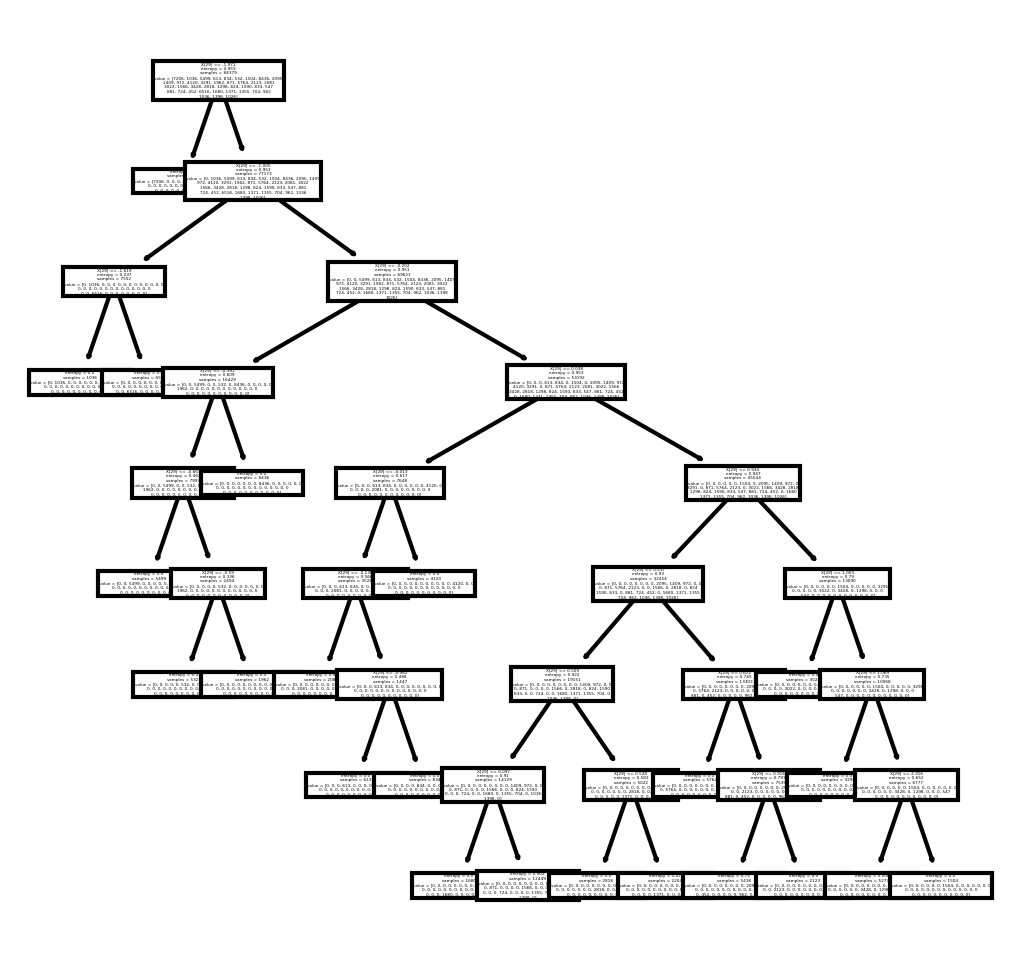

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(model)
fig.savefig('DT_image1.png')

In [7]:
#optimizing
clf = tree.DecisionTreeClassifier(max_depth=8,criterion="entropy")
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy.append(accuracy_score(y_test, y_pred))
print("accuracy score of DT_entropy =",accuracy[-1])

accuracy score of DT_entropy = 1.0


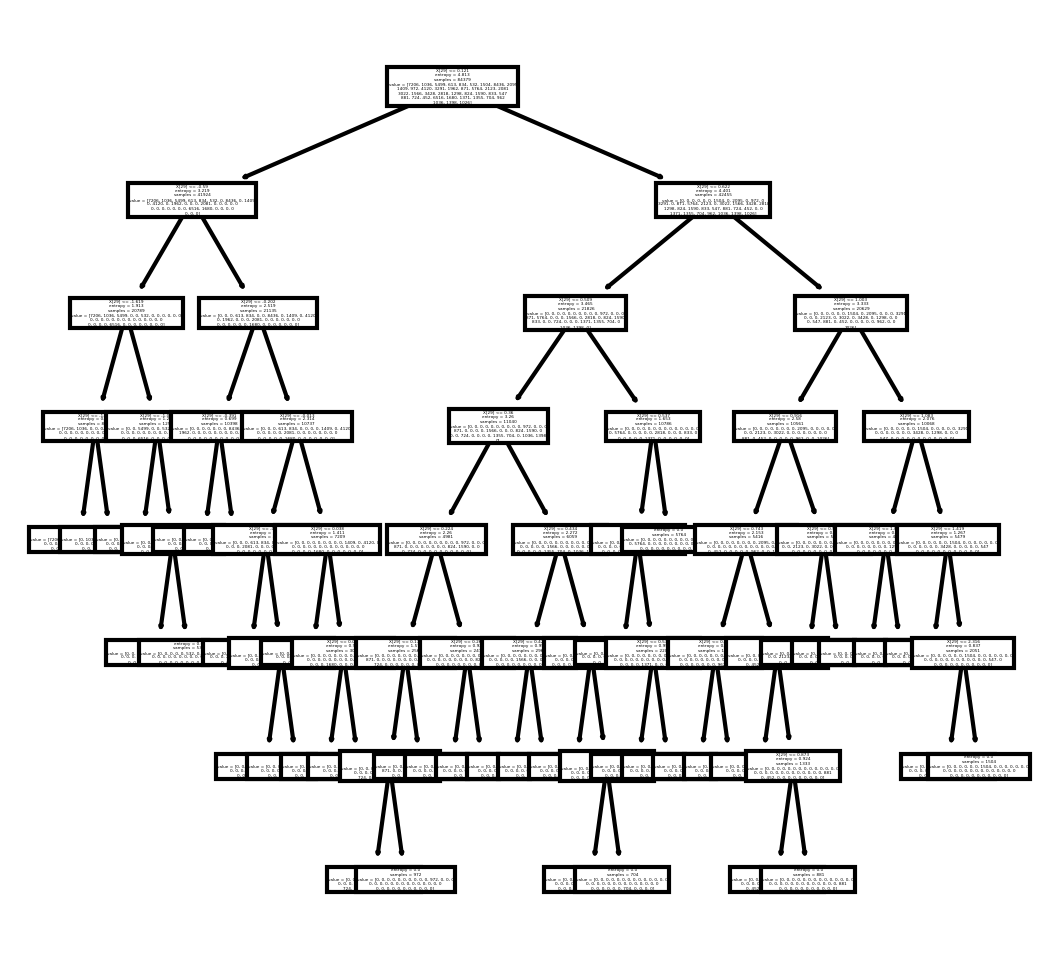

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(clf)
fig.savefig('DT_image2.png')

In [23]:
#Random Forest Classifier



scores = []
estimators = [10, 25, 50, 75, 100]
for i in estimators:
    # Create the model with i number of trees
    model = RandomForestClassifier(n_estimators=i, bootstrap=True, max_features='sqrt')
    # Fit on training data
    model.fit(X_train, y_train)
    rf_predictions = model.predict(X_test)
    scores.append(accuracy_score(y_test, rf_predictions))
    
max_score = max(scores)
index = scores.index(max_score)
nu_trees = estimators[index]
print("max_score", max_score)
print("nu_trees",nu_trees)
accuracy.append(max_score)
print("accuracy score of Random Forest Classifier for number of trees :", nu_trees, "is",accuracy[-1])

max_score 0.8920167021541354
nu_trees 75
accuracy score of Random Forest Classifier for number of trees : 75 is 0.8920167021541354


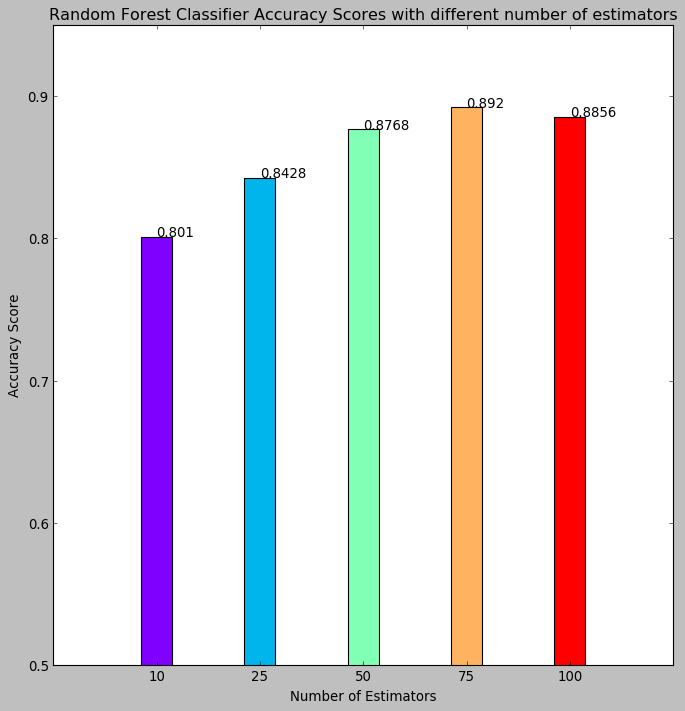

In [24]:
# Plotting the RFC
from matplotlib.cm import rainbow

plt.style.use(['_classic_test'])
rcParams['figure.figsize'] = 10,10

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], scores, color=colors, width=0.3)

for i in range(len(estimators)):
    plt.text(i, round(scores[i], 4), round(scores[i], 4))
    
plt.xticks(ticks=[i for i in range(len(estimators))], labels = [estimator for estimator in estimators])
plt.ylim(0.5, 0.95)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Classifier Accuracy Scores with different number of estimators")
plt.show()

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDF = pd.concat([principalDF, df[['course_id']]], axis=1)
alpha = 0.90
pca = PCA(alpha)
pca_fit = pca.fit(X_train)

training = pca.transform(X_train)
testing = pca.transform(X_test)

print("No of attributes after PCA with alpha =",alpha, "is", training.shape[1])

No of attributes after PCA with alpha = 0.9 is 14


In [ ]:
# print((pca.components_.shape))

In [13]:
#Support vector classifier
#linear kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(training, y_train)
y_pred = svclassifier.predict(testing)
accuracy.append(accuracy_score(y_test,y_pred))
print("accuracy score of linear_SVM =",accuracy[-1])

accuracy score of linear_SVM = 0.7797749080551946


In [14]:
#Polynomial kernel
svclassifier = SVC(kernel='poly', degree=4, gamma='auto')
svclassifier.fit(training, y_train)
y_pred = svclassifier.predict(testing)
accuracy.append(accuracy_score(y_test,y_pred))
print("accuracy score of poly_SVM =",accuracy[-1])

accuracy score of poly_SVM = 0.49520227857202115


In [15]:
#Gaussian Kernel
svclassifier = SVC(kernel='rbf',gamma='auto')
svclassifier.fit(training, y_train)
y_pred = svclassifier.predict(testing)
accuracy.append(accuracy_score(y_test,y_pred))
print("accuracy score of rbf_SVM =",accuracy[-1])

accuracy score of rbf_SVM = 0.6842352680916959


In [16]:
#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid',gamma='auto')
svclassifier.fit(training, y_train)
y_pred = svclassifier.predict(testing)
accuracy.append(accuracy_score(y_test,y_pred))
print("accuracy score of sigmoid_SVM =",accuracy[-1])

accuracy score of sigmoid_SVM = 0.289107651466969


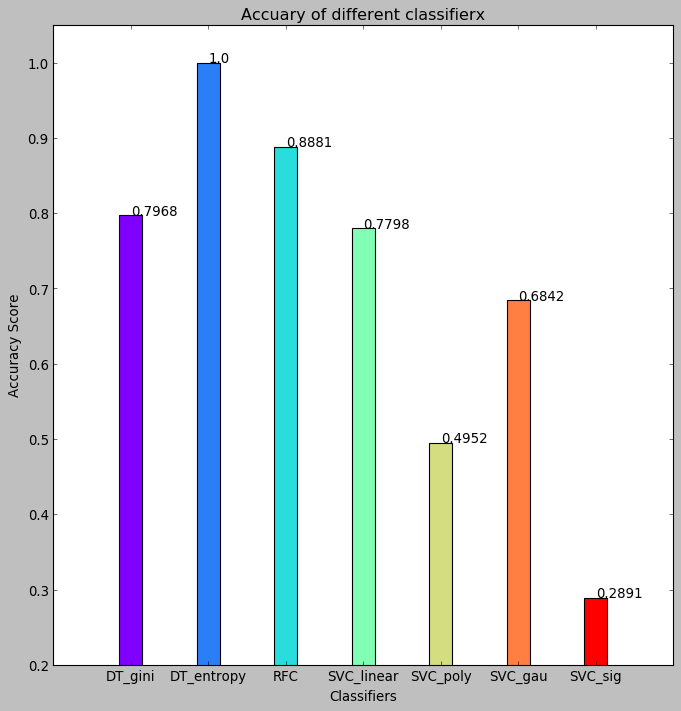

In [18]:
# Plotting the RFC
colors = rainbow(np.linspace(0, 1, len(accuracy)))
plt.bar([i for i in range(len(accuracy))], accuracy, color=colors, width=0.3)

for i in range(len(accuracy)):
    plt.text(i, round(accuracy[i], 4), round(accuracy[i], 4))
    
plt.xticks(ticks=[i for i in range(len(accuracy))], labels = [name for name in names])
plt.ylim(0.2, 1.05)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Score")
plt.title("Accuary of different classifierx")
plt.show()